### Importing library and data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import datashader as ds, pandas as pd, colorcet
import datashader.transfer_functions as tf
import holoviews as hv
from holoviews.element.tiles import EsriImagery
from holoviews.operation.datashader import datashade
import colorcet as cc
import seaborn as sns

In [4]:
# Importing the data
df= pd.read_csv('/home/jabez/Documents/week_8/Logistic-optimization-Delivery-drivers-location-optimisation-with-Causal-Inference-/data/df_with_added_features.csv')

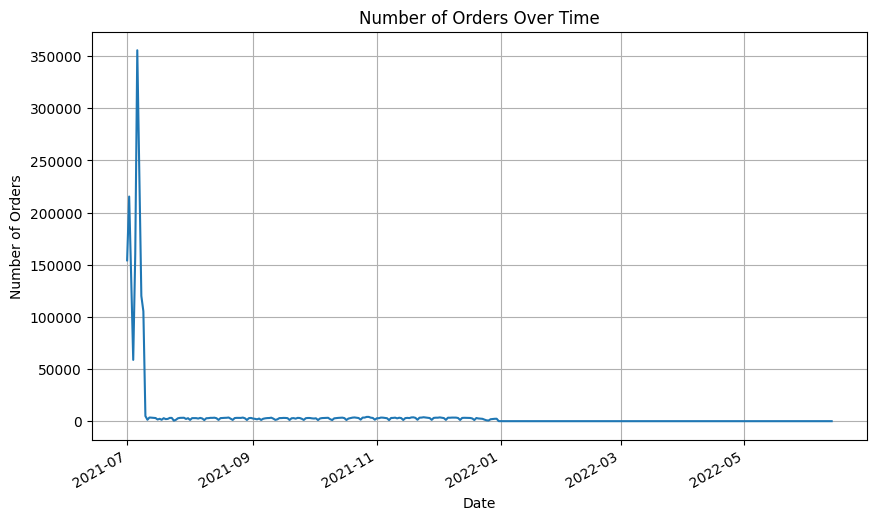

In [5]:
df['date'] = pd.to_datetime(df['date'])

# Group by date and count orders
orders_over_time = df.groupby('date').size()

# Plot
plt.figure(figsize=(10, 6))
orders_over_time.plot()
plt.title('Number of Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

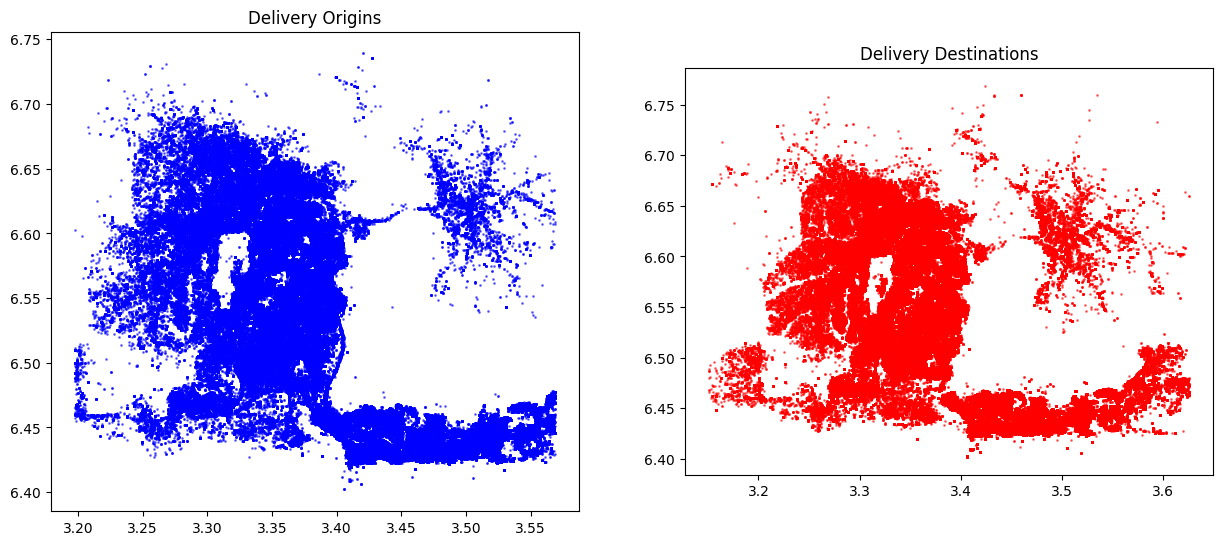

In [6]:

# Create GeoDataFrame for origins and destinations
gdf_orig = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon_org, df.lat_org))
gdf_dest = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon_des, df.lat_des))

# Plot
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
gdf_orig.plot(ax=ax[0], markersize=1, color='blue', alpha=0.5)
gdf_dest.plot(ax=ax[1], markersize=1, color='red', alpha=0.5)
ax[0].set_title('Delivery Origins')
ax[1].set_title('Delivery Destinations')
plt.show()

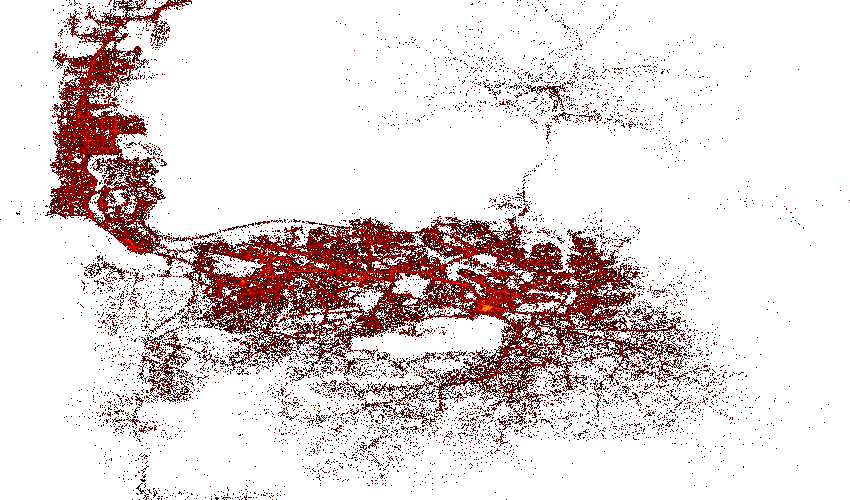

In [12]:
cvs = ds.Canvas(plot_width=850, plot_height=500)
agg = cvs.points(df, 'lat_org', 'lon_org')
img = ds.tf.shade(agg, cmap=colorcet.fire, how='log')
img

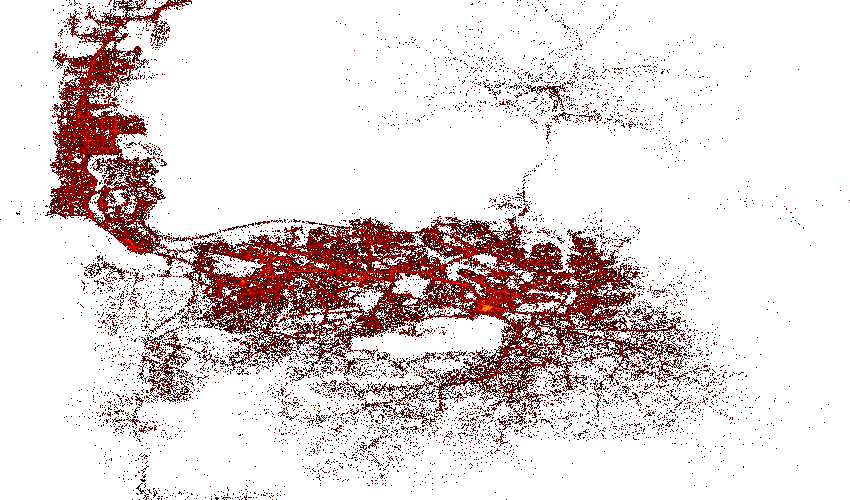

In [19]:
from datashader.utils import export_image
export_image(img, filename='output_image', fmt='.png')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
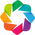

In [22]:

hv.extension('bokeh')

# Your existing code
map_tiles  = EsriImagery().opts(alpha=0.5, width=900, height=480, bgcolor='black')
points     = hv.Points(df, ['lat_des', 'lon_des'])  # Note: 'lat_des' instead of 'at_des'
trips = datashade(points, x_sampling=1, y_sampling=1, cmap=cc.fire, width=900, height=480)

# Combine map tiles and trips
combined = map_tiles * trips

In [25]:
# Save the plot as an HTML file with interactive features
hv.save(combined, 'output_image.html', fmt='html')

# Optionally display the plot in a Jupyter notebook (if using one)
combined

BokehModel(combine_events=True, render_bundle={'docs_json': {'b35aedca-2e78-43be-930f-3c14c75ff009': {'version…

/tmp/ipykernel_5844/1359453683.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_locations[df_locations['driver_action'] == 'accepted']['distance_to_centroid_km'], shade=True, label='Accepted', color='green')
/tmp/ipykernel_5844/1359453683.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_locations[df_locations['driver_action'] == 'rejected']['distance_to_centroid_km'], shade=True, label='Rejected', color='red')


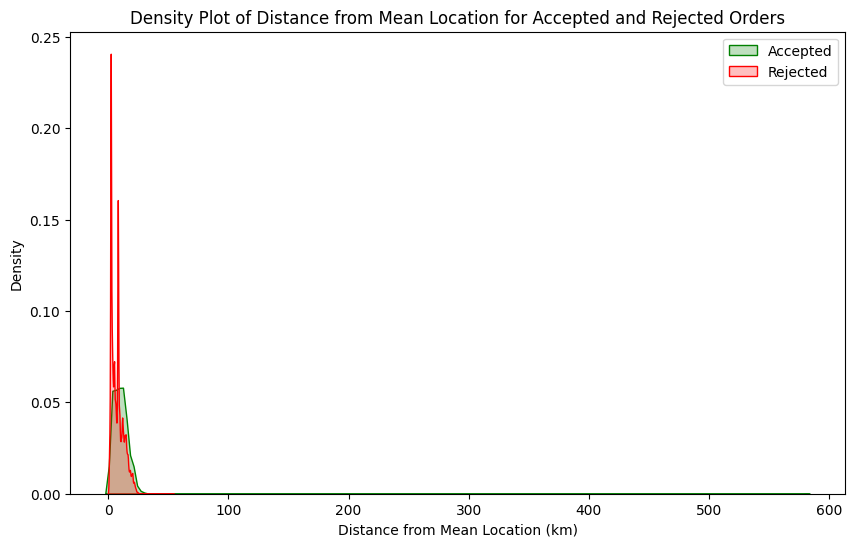

In [17]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['driver_action'] == 'accepted']['distance_to_centroid_km'], shade=True, label='Accepted', color='green')
sns.kdeplot(df[df['driver_action'] == 'rejected']['distance_to_centroid_km'], shade=True, label='Rejected', color='red')
plt.xlabel('Distance from Mean Location (km)')
plt.ylabel('Density')
plt.title('Density Plot of Distance from Mean Location for Accepted and Rejected Orders')
plt.legend()
plt.show()

In [ ]:
colors = ['red', 'blue', 'green', 'purple', 'orange']  # List of colors

# Scatter Plot with Colors
plt.scatter(df_trip[''], df2['Y'], color=colors)
plt.xlabel('X axis label')
plt.ylabel('Y axis label')
plt.title('Scatter Plot with Different Colors from Different DataFrames')
plt.show()

In [18]:
df_rejected = df_locations[df_locations['driver_action']=='rejected']
df_rejected

,id,order_id,driver_id,driver_action,lat,lng,distance_to_centroid_km
1,2,392001,243588,rejected,6.592097,3.287445,11.869231
2,3,392001,243830,rejected,6.596133,3.281784,12.637143
3,4,392001,243539,rejected,6.596142,3.280526,12.755756
4,5,392001,171653,rejected,6.609232,3.288800,12.855326
5,6,392001,245662,rejected,6.593095,3.287759,11.898462
...,...,...,...,...,...,...,...
1557735,1557736,517948,243774,rejected,6.469036,3.566877,22.065685
1557736,1557737,517948,245447,rejected,6.425431,3.527358,20.502798
1557737,1557738,517948,239866,rejected,6.440013,3.525378,19.390130
1557738,1557739,517948,243774,rejected,6.469036,3.566877,22.065685


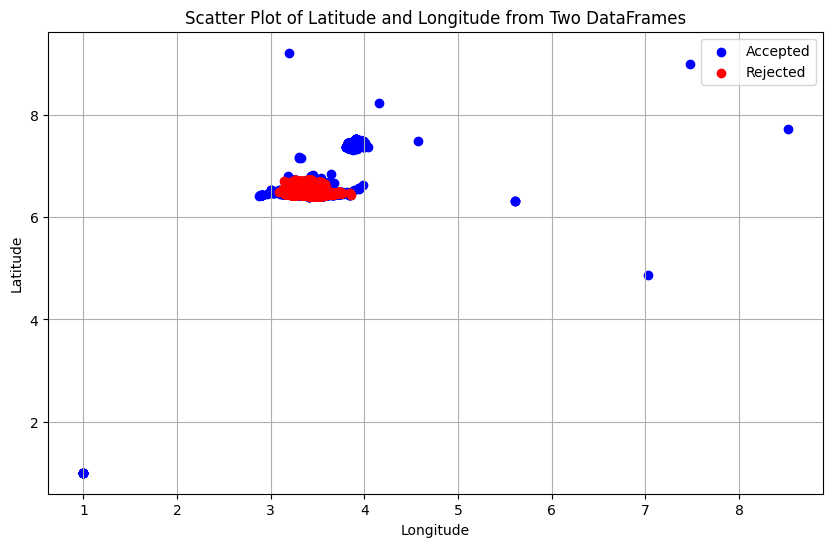

In [19]:
plt.figure(figsize=(10, 6))

# Scatter plot for the first dataframe
plt.scatter(df_trip['lon_org'], df_trip['lat_org'], color='blue', label='Accepted')

# Scatter plot for the second dataframe
plt.scatter(df_rejected['lng'], df_rejected['lat'], color='red', label='Rejected')

# Adding labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Latitude and Longitude from Two DataFrames')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

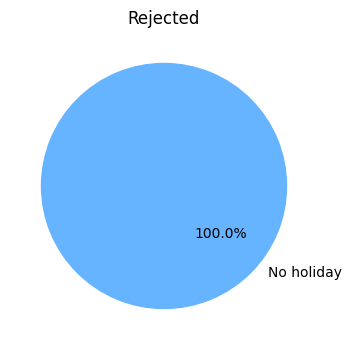

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.pie(status, labels=status.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'])
plt.title('Rejected')
plt.show()

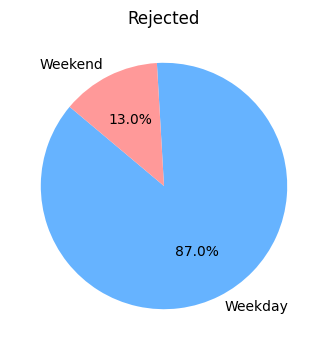

In [47]:
status = df_location['day_type'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(status, labels=status.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'])
plt.title('Rejected')
plt.show()

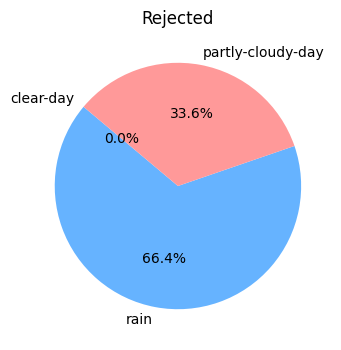

In [50]:
status = df_location['icon'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(status, labels=status.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'])
plt.title('Rejected')
plt.show()

1213 Drivers

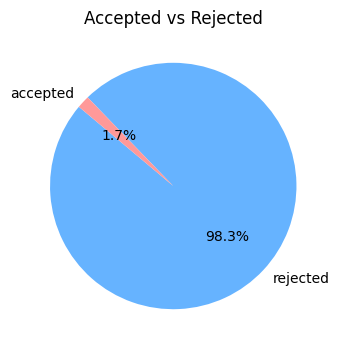

In [6]:

plt.figure(figsize=(4, 4))
plt.pie(status, labels=status.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'])
plt.title('Accepted vs Rejected')
plt.show()